In [ ]:
using Pkg, Revise
gla_dir = "../GenLinAlgProblems"
Pkg.activate(gla_dir)

using GenLinAlgProblems, LinearAlgebra, Latexify, LaTeXStrings,Random,  Printf, SymPy, Plots

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")
;

<div style="float:center;width:100%;text-align:center;"><strong style="height:100px;color:darkred;font-size:40px;">Complex EigenProblems</strong>
</div>

# 1. Complex Numbers

## 1.1 Definition and Basic Operations

Complex numbers are usually written as $\alpha + \beta i$, where $\alpha$ and $\beta$ are scalars,
<br>$\qquad$the **real part** and the **imaginary part** of the complex number respectively.

#### 1.1.1 **Examples:**

* $3+2i,\; \pi + i,\; 3i,\; -\frac{7}{5}$<br>
where we have chosen to omit the real part or the imaginary part when they equal 0, i.e., $3 i$ is the complex number $0 + 3i$.

#### 1.1.2 **Operations** using complex numbers are defined as follows

* **Equality:**       $\qquad\qquad\quad \alpha + \beta\ i = a + b i \Leftrightarrow \left\{ \begin{align} \alpha = a \\ \beta = b \end{align} \right.$
* **Real Part:**      $\qquad\qquad\;\; Re( \alpha + \beta\ i ) = \alpha$
* **Imaginary Part:** $\qquad\;\ Im( \alpha + \beta\ i ) = \beta$

* **Complex Conjugate:** $\quad \overline{\alpha + \beta \ i} = \alpha - \beta\ i$

* **Addition:**       $\qquad\qquad ( \alpha + \beta \ i ) + ( a + b\ i ) = ( \alpha + a ) + ( \beta + b )\ i$
* **Multiplication:** $\qquad  ( \alpha + \beta \ i )\ ( a + b \ i ) = ( \alpha b - a \beta ) + ( \alpha a + \beta b )\ i$

i.e., addition behaves the same as scalar addition, treating $i$ as a symbol, while<br>
$\quad$ multiplication  behaves the same as scalar multiplication, with the added rule that $i^2 = -1$

**Note:** We can write $\alpha + \beta\ i$ or $\alpha  + i\ \beta$ and use the same conventions as those used in scalar algebra.

**Special Cases:**
* $\alpha ( a + b\ i) = \alpha a + \alpha b\ i$ $\qquad\qquad$ multiplication of a complex number by a real scalar
* $( \alpha + \beta\ i )^2 = ( \alpha^2 - \beta^2 ) + 2 \alpha \beta\ i$ $\quad\;\; $ a complex number in general
* $( \alpha + \beta\ i )\ \overline{ ( \alpha + \beta\ i )} = \alpha^2 + \beta^2$ $\qquad$ a non-negative real value

* **Division** $\qquad \frac{\alpha + \beta\ i}{a + b\ i} = \frac{\left(\alpha + \beta\ i\right)\ \left( a - b\ i \right)}{\left( a + b\ i\right)\ \left( a-b\ i\right)} = \frac{1}{a^2+b^2} \left(\alpha+\beta\ i\right)\ \left( a - b\ i\right)$

In [2]:
# Julia uses 'im' for 'i'
x=3+2im; y=-2+4im
@show x
@show y
println()
@show x+y
@show x*y
println()
@show x^2
@show x*conj(x)
println()
@show x/y
@show 1/(conj(y)*y) * x * conj(y)
;

x = 3 + 2im
y = -2 + 4im

x + y = 1 + 6im
x * y = -14 + 8im

x ^ 2 = 5 + 12im
x * conj(x) = 13 + 0im

x / y = 0.1 - 0.8im
(1 / (conj(y) * y)) * x * conj(y) = 0.09999999999999998 - 0.8im


#### 1.1.3 **First Geometric Interpretation**

Identify a complex number $z = \alpha + \beta\ i$ as a vector $\begin{pmatrix} \alpha \\ \beta \end{pmatrix},$ i.e. **a point in a plane**

**This is an isomorphism:**  Addition and scalar multiplication can be carried out with complex numbers or with 2D vectors, yielding the same results.

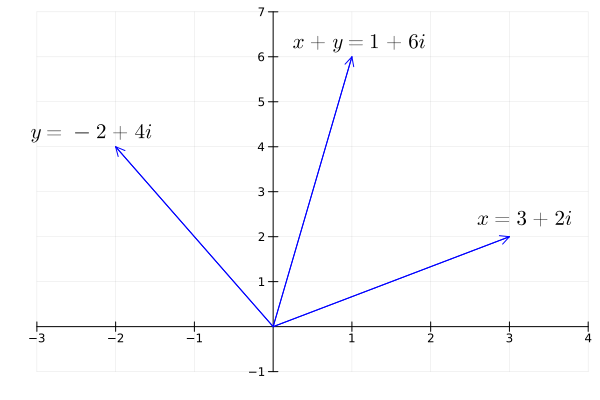

In [4]:
plot([0 0 0; real(x) real(y) real(x+y)], [0 0 0; imag(x) imag(y) imag(x+y)], arrow = true, color = :blue,
     legend = :none, xlims = (-3, 4), ylims = (-1, 7),
     annotations = [(3.2, 2.4, L"x=3+2 i"),
                    (-2.3, 4.3, L"y=-2+4 i"),
                    (1.1, 6.3, L"x+y=1+6i")],
     xticks = -3:1:4, yticks = -1:1:7,
     framestyle = :origin)

## 1.2 Polar Representation, Euler's Formula

#### 1.2.1 **Polar Representation**

The geometric interpretation of a point in the plane suggests describing a complex number as a distance from the origin and the angle with respect to the x axis:

$\qquad
\alpha + i \beta = r ( cos \theta + i sin \beta ), \quad \text{where } r = \sqrt{ \alpha^2 + \beta^2 }, \; \cos \theta = \frac{\alpha}{r}, \text{ and } \sin \theta = \frac{\beta}{r}
$

**Remark:** $r^2 = \overline{ (\alpha+ \beta\ i) }\ (\alpha+ \beta\ i)$ $\qquad$ (the special case of complex multiplication discussed above)

Since we can compute powers of complex numbers, we can define power series. (We will ignore convergence questions in this brief outline.)

Of particular interest is the power series $e^x = \sum_{i=0}^\infty { \frac{ x^n }{ n ! }}$.

Substituting $x = i \theta$ and collection real and imaginary terms yields **Euler's Formula:**

$\qquad \boxed{e^{i \theta} = \cos \theta + i \sin \theta}$

Substituting this equation in the polar form of a complex number yields

$\qquad
\boxed{ \alpha + i \beta = r e^{i \theta} }, \quad \text{where } r = \sqrt{ \alpha^2 + \beta^2 }, \; \cos \theta = \frac{\alpha}{r}, \text{ and } \sin \theta = \frac{\beta}{r}
$

In [4]:
# Example x
display( L"\text{The polar representation of } x = r e^{i \theta} \text{ is given by}")
@show r_x = round( abs(x),           digits=3)
@show θ_x = round( 180/π * angle(x), digits=3)

L"$\text{The polar representation of } x = r e^{i \theta} \text{ is given by}$"

r_x = round(abs(x), digits = 3) = 3.606
θ_x = round((180 / π) * angle(x), digits = 3) = 33.69


33.69

#### 1.2.2 **Euler's Formula and Complex Multiplication**

Let $x = r_x e^{i \theta_x}$ and $y = r_y e^{i \theta_y}$ be two complex numbers. Using Euler's formula and basic trigonometric identities, we find

$\qquad x y = r_x r_y\ e^{i \theta_x}\ e^{i \theta_y} = r_x r_y\ e^{i \left( \theta_x + \theta_y \right)}\quad$

* The length of the resulting vector is the **product of the lengths** of $x$ and $y$ 
* The angle of the resulting vectors is the **sum of the angles** of $x$ and $y$

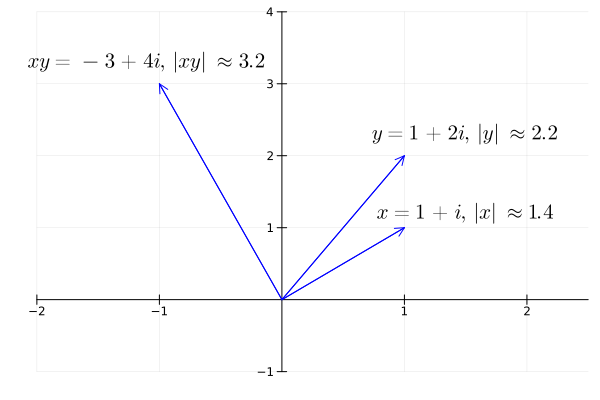

In [8]:
x=1+1im; y = 1+2im
plot([0 0 0; real(x) real(y) real(x*y)], [0 0 0; imag(x) imag(y) imag(x*y)], arrow = true, color = :blue,
     legend = :none, xlims = (-2, 2.5), ylims = (-1, 4),
     annotations = [(1.5, 1.2, L"x=1+i,  \;\vert x \vert \approx 1.4"),
                    (1.5, 2.3, L"y=1+2 i,\; \vert y \vert \approx 2.2"),
                    (-1.1, 3.3, L"x y = -3+4i,\;  \vert x y \vert \approx 3.2")],
     xticks = -2:1:2, yticks = -1:1:4,
     framestyle = :origin)

**Remark:** Complex multiplication and the identity $e^{i \left( \theta + \phi \right) } = e^{i \theta}\ e^{i \phi}$
* provide an easy way to **recover trigonometric identities**, e.g.,<br>
$\sin\left( \theta + \phi \right) = Im \left(  e^{i \theta}\ e^{i \phi} \right) = \cos \theta\ \sin\phi + \sin\theta \cos\phi$
* provide an easy way to recover the **sine or cosine of some well known angles**, e.g.,<br>
$\sin\left(150^\circ\right) = \sin\left(180^\circ - 30^\circ\right) = Im\left( e^{i \left(\pi - \frac{\pi}{6} \right)}\right)
= Im\left( e^{i \pi} e^{- i \frac{\pi}{6} }\right) = \sin\frac{\pi}{6} = \frac{1}{2}\quad
$ (since $e^{i \pi} = -1$)


#### 1.2.3 Geometric Interpretation of Multiplication by $e^{i \phi}$

Consider $x = r e^{i \theta}$. Then $e^{i \phi} x = r e^{i \left( \theta + \phi \right)}$

$\qquad \therefore $ **Applying $e^{i \phi}$ to a 2D vector $x$ rotates the vector by an angle $\phi$**

We can therefore represent a complex number $r e^{i \theta} = r \left( \cos\theta + i \sin\theta \right) = a+ i\ b$<br>$\qquad$ by the a rotation matrix and a scalar multiplication $\quad r \begin{pmatrix} \cos\theta& -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} = \left( \begin{array}{rr} a & -b \\ b & a \end{array} \right)$

In [10]:
# Given a vector
x = 3-2im
@show x
# rotation and scaling in polar representation
r = 2; θ = π/6

# rotation and scaling in cartesian representation
y = r*exp(θ*1im)
println("\nScale by r=$r,  rotate by ",L"\frac{\pi}{6}")
println(".  Complex number representation:\n.     ", round.(y, digits=2) )
println("\n.  Matrix Representation")
R = r*[cos(θ) -sin(θ); sin(θ) cos(θ)]
latexify( round.( R, digits=2))

x = 3 - 2im

Scale by r=2,  rotate by $\frac{\pi}{6}$
.  Complex number representation:
.     1.73 + 1.0im

.  Matrix Representation


L"\begin{equation}
\left[
\begin{array}{cc}
1.73 & -1.0 \\
1.0 & 1.73 \\
\end{array}
\right]
\end{equation}
"

In [11]:
println( "Apply the rotation and scaling using complex numbers")
println(".  ",  round( y*x,  digits=2))

println( "Apply the rotation and scaling matrix to the vector")
println(".  ",  round.( R*[real(x);imag(x)], digits=2))

Apply the rotation and scaling using complex numbers
.  7.2 - 0.46im
Apply the rotation and scaling matrix to the vector
.  [7.2, -0.46]


#### 1.2.4 **Composition of Rotation and Scaling Matrices**

We can also consider the combined linear transformation represented by the complex numbers $r_1 e^{i \theta_1}$ and $r_2 e^{i \theta_2}$

Trigonomic identities ensure that
* $r_1 e^{i \theta_1} \  r_2 e^{i \theta_2} = r_1 r_2 e^{i \left( \theta_1 + \theta_2 \right)}$
* $r_1 \begin{pmatrix} \cos\theta_1 & -\sin\theta_1 \\
                       \sin\theta_1 &  \cos\theta_1 \end{pmatrix} \;
   r_2 \begin{pmatrix} \cos\theta_2 & -\sin\theta_2 \\
                       \sin\theta_2 &  \cos\theta_2 \end{pmatrix}
   = r_1 r_2 \begin{pmatrix} \cos\left( \theta_1+\theta_2 \right) & -\sin\left( \theta_1+\theta_2 \right) \\
                             \sin\left( \theta_1+\theta_2 \right) &  \cos\left( \theta_1+\theta_2 \right) \end{pmatrix}$

$\therefore$ **We can mix the vector and matrix representations of complex numbers!** 

## 1.3 Vectors With Complex Entries

#### **1.3.1 Two Vectors with Real Entries**

Given a vector $v = \begin{pmatrix} v_1\\v_2\\ \dots \\ v_n \end{pmatrix},$
$\quad$ extend the definitions to apply to each entry:

* **Real Part:** $\qquad\qquad\quad Re(v) = \begin{pmatrix} Re(v_1) \\ Re(v_2) \\ \dots \\ Re(v_n) \end{pmatrix}$
* **Imaginary Part:** $\qquad\quad Im(v) = \begin{pmatrix} Im(v_1) \\ Im(v_2) \\ \dots \\ Im(v_n) \end{pmatrix}$

* **Complex conjugate:** $\qquad \overline{v} = \begin{pmatrix} \overline{v_1} \\ \overline{v_2} \\ \dots \\ \overline{v_n} \end{pmatrix}$


#### **1.3.2 Two Consequences**

##### **A Complex Vector Encodes Two Real Vectors**

e.g., $\quad
\left(
\begin{array}{c}
1+3\mathit{i} \\ 4-2\mathit{i} \\ 2+0\mathit{i} \\ 2\mathit{i} \\
\end{array}
\right)
= \left( \begin{array}{c} 1 \\ 4 \\ 2 \\ 0 \\ \end{array} \right)
+ i \left( \begin{array}{c} 3 \\ -2 \\ 0 \\ 2 \\ \end{array} \right)
$

In [12]:
v = [ 1+3im;  4-2im; 2; 2im]
@show v
@show real(v)
@show imag(v);

v = Complex{Int64}[1 + 3im, 4 - 2im, 2 + 0im, 0 + 2im]
real(v) = [1, 4, 2, 0]
imag(v) = [3, -2, 0, 2]


____
We can transform the vector $v = Re(v) + i\ Im(v)\quad$ into a matrix $\;\;\left( Re(v) \; Im(v) \right)$

In [13]:
V = [real(v) imag(v)]
latexify(V)

L"\begin{equation}
\left[
\begin{array}{cc}
1 & 3 \\
4 & -2 \\
2 & 0 \\
0 & 2 \\
\end{array}
\right]
\end{equation}
"

##### **Apply a Rotation and Scaling to Each Vector Entry**

Let $x = r e^{i \theta}$, and $v = \begin{pmatrix} v_1\\v_2\\ \dots \\ v_n \end{pmatrix},$ a vector with complex entries

The corresponding matrix representations are<br>
$\qquad X =  r \begin{pmatrix} \cos\theta & - \sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$ for $z,\;\;$ and
$\;\; V = \left( Re(v)\; Im(v) \right) \;\;$ for $v$.

* The complex scalar multiplication $x\ v$ applies the scaling by $r$ and rotation by $\theta$ to each entry in $v$
* The corresponding operation in matrix form is achieved by $V Z^t$: it rotates and scales the vectors in the (hyper)plane defined by the two vectors.
* **Remark:** the matrix $Z^t$ represents the inverse rotation $\overline{x}$, the scaling by $r$ and the rotation by $-\theta$.

In [14]:
println("The scalar product x v =")
latexify(x*v)

The scalar product x v =


L"\begin{equation}
\left[
\begin{array}{c}
9+7\mathit{i} \\
8-14\mathit{i} \\
6-4\mathit{i} \\
4+6\mathit{i} \\
\end{array}
\right]
\end{equation}
"

In [15]:
r = abs(x); c = real(x)/r; s = imag(x)/r
X = r*[c -s; s c]

println( "the matrix X ≈" )
latexify([ round(r, digits=2), round.(X, digits=2)' ]')

the matrix X ≈


L"\begin{equation}
\left[
\begin{array}{cc}
3.61 & \left[
\begin{array}{cc}
3.0 & 2.0 \\
-2.0 & 3.0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [16]:
println( "The product V Xᵗ =")
latexify( Int.(round.( V*X', digits=2)) )

The product V Xᵗ =


L"\begin{equation}
\left[
\begin{array}{cc}
9 & 7 \\
8 & -14 \\
6 & -4 \\
4 & 6 \\
\end{array}
\right]
\end{equation}
"

## 1.4 Takeaway

* Addition and multiplication of complex numbers can encode vector addition, scalar multiplication and rotations for real vectors.
* Encoding these operations by using complex numbers makes algebraic manipulations simple, at the price of losing easy geometrical interpretations. 

# 2 Complex Eigendecompositions

Matrices with real entries can have complex eigenvalues.

In [17]:
Random.seed!(13)

S,Λ,Sinv,A = gen_cx_eigenproblem( [1+2im] )

println("Consider the following matrix A =")
latexify( A )

Consider the following matrix A =


L"\begin{equation}
\left[
\begin{array}{cc}
-1 & -4 \\
2 & 3 \\
\end{array}
\right]
\end{equation}
"

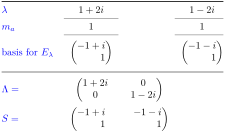

In [19]:
nM.show_eig_tbl(A,fig_scale=1,  tmp_dir="/tmp" )

In [20]:
println( "Let's check: ")
S_cx = [-1+im -1-im; 1 1 ]
Λ_cx = [1+2im 0; 0 1-2im]

@show (A * S_cx == S_cx * Λ_cx);

Let's check: 
A * S_cx == S_cx * Λ_cx = true


The product of complex matrices $S \Lambda S^{-1}$ multiply out to the real matrix $A$, i.e. $Im\left( S \Lambda S^{-1} \right) = 0$

Let us try and take advantage of this: Consider the real matrix $A$ with a complex eigenpair $( \lambda, s )$,
<br> $\qquad$ where the real and imaginary parts are given by $\lambda = \lambda' + i\ \lambda''$ and  $s = s' + i\ s''$

We have<br>
$\qquad \begin{align} A (s'+i\ s'') =& (\lambda' + i \ \lambda'')(s'+i\ s'') \\ =& (\lambda' s' - \lambda'' s') + i \ (\lambda' s'' + \lambda'' s')\end{align}$.<br>

Splitting this equation into the real and imaginary parts, and combining them in matrix form yields

$\qquad A s'= (\lambda' s' - \lambda'' s') \Leftrightarrow $ $A \left( s' \; s'' \right) = (s' \; s'') \begin{pmatrix} \lambda'& \lambda'' \\ -\lambda'' & \lambda' \end{pmatrix}$

We recognize this as the $(s' \; s'' )$ matrix is composed of the real part $s'$ and the imaginary part $s''$ of the eigenvector,<br>
$\qquad$ while the matrix $C$ involving the eigenvalue is the matrix representation of the complex eigenvalue $\overline{\lambda}$.

**The eigenvalue applies a rotation and a scale factor to each of the real and imaginary component of the eigenvector
<br>$\qquad$ in the (hyper)plane defined by these components!**

For the example at hand, we have $A = S C S^{-1}$, where

$\qquad S = \begin{pmatrix} -1 & 1 \\ 1 & 0 \end{pmatrix}$ and $C = \begin{pmatrix} 1 & 2 \\ -2 & 1 \end{pmatrix} \quad$ (the conjugate of the eigenvalue!)

In [21]:
println( "Check:  A = S C S⁻¹")
S = [-1 1; 1 0]; C = [1 2; -2 1]
@show A*S == S*C;

Check:  A = S C S⁻¹
A * S == S * C = true


## 2.2 A Larger Example

Each additional complex eigenpair produces corresponding matrices.<br>
In this example, the characteristic polynomial is given by<br> $\qquad p(\lambda)=-(\lambda-1-2i)^2(\lambda -1+2i)^2\lambda$

Each of the conjugate pairs $1+2i, 1-2i$ produces corresponding entries in the decomposition matrices.

In [22]:
println( "Consider the following matrix A")

A=[   1    0   -5   1   -3
     -4   -7  -11   5   -3
      6    8    4  -5   -3
      2    0  -15   2  -11
     -8  -10   -5   7    4 ]
latexify(A)

Consider the following matrix A


L"\begin{equation}
\left[
\begin{array}{ccccc}
1 & 0 & -5 & 1 & -3 \\
-4 & -7 & -11 & 5 & -3 \\
6 & 8 & 4 & -5 & -3 \\
2 & 0 & -15 & 2 & -11 \\
-8 & -10 & -5 & 7 & 4 \\
\end{array}
\right]
\end{equation}
"

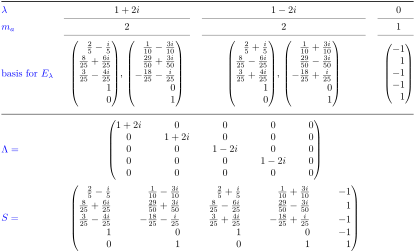

In [24]:
nM.show_eig_tbl(A,fig_scale=1,  tmp_dir="/tmp" )

To construct the real matrices, we need to use for a complex eigenvalue together with the conjugate of the eigenvalue.

Here, we could work with either $1+2i$ or $1-2i$. Let's pick eigenvalue $\lambda = 1-2i$ which has matrix representation $\begin{pmatrix} 1 & 2 \\ -2 & 1 \end{pmatrix}$<br>
The real eigenvalues and eigenvectors are treated as before.

In [25]:
C = [  1 2   0 0  0          # block for 1-2i
      -2 1   0 0  0
       0 0   1 2  0          # block for 1-2i
       0 0  -2 1  0
       0 0   0 0  0 ]        # eigenvalue 0

println( "The diagonal Λ matrix is replaced by C =")
latexify(C)

The diagonal Λ matrix is replaced by C =


L"\begin{equation}
\left[
\begin{array}{ccccc}
1 & 2 & 0 & 0 & 0 \\
-2 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 2 & 0 \\
0 & 0 & -2 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

Since we chose the eigenvalue $1-2i$, the $S$ matrix will contain the real and imaginary parts of the eigenvectors for eigenvalue $1+2i$

In [26]:
println( "The S matrix is given by" )
S = [ 2//5   -1//5      1//10 -3//10     -1
      8//25  6//25     29//50  3//50      1
      3//25 -4//25    -18//25 -1//25     -1
      1      0          0      0         -1
      0      0          1      0          1]   # the first and second columns split into real and imaginary parts (λ = 1+2i), and the last column (λ = 0)

latexify(S)

The S matrix is given by


L"\begin{equation}
\left[
\begin{array}{ccccc}
\frac{2}{5} & \frac{-1}{5} & \frac{1}{10} & \frac{-3}{10} & -1 \\
\frac{8}{25} & \frac{6}{25} & \frac{29}{50} & \frac{3}{50} & 1 \\
\frac{3}{25} & \frac{-4}{25} & \frac{-18}{25} & \frac{-1}{25} & -1 \\
1 & 0 & 0 & 0 & -1 \\
0 & 0 & 1 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

We now have achieved the decomposition $A = S C S^{-1}$

In [27]:
@show A*S == S*C;

A * S == S * C = true
